# Données textuelles - Partie 2

Dans cette partie du cours, nous allons revenir sur les notions que nous avons vues au cours précédent, en particulier le ``CountVectorizer``, et apprendre comment modifier ses paramètres pour améliorer le traitement des données. Avant cela, nous alons revenir sur certains concepts du Machine-Learning pour expliquer les résultats que nous avons obtenus avec le modèle précédent.

## Appfitting, underfitting, overfitting

Entraîner un modèle consiste à fournir des données à un algorithme de tel sorte qu'il apprenne de lui-même par essai-erreur les différents paramètres lui permettant de prédire de nouveaux résultats. 

Cependant, bien qu'il suffise de fournir les données à l'algorithme, entraîner correctement un modèle n'est pas si simple, et il est très fréquent de créer des modèles qui ne soient pas capables de généraliser. Cette difficulté à généraliser peut s'expliquer de deux manières : soit le modèle n'est pas capable d'apprendre les paramètres à partir des données, soit au contraitre il apprend ces paramètres beaucoup trop bien. Dans le premier cas, le modèle est "mal-entraîné" et prédit un résultat au hasard. Dans le second, le modèle a tellement bien appris à partir des données d'entraînement qu'il ne sait pas comment traiter de nouvelles données. 

En machine-learning, on parle respectivement d'``underfitting`` et d'``overfitting``


### Underfitting

L'underfitting désigne le cas où le modèle n'a pas appris correctement les paramètres à partir des données d'entraînement, et n'est donc pas capable de généraliser. On peut le repérer lorsque les résultats de l'entraînement ne sont pas concluants. 

En général, les cas d'underfitting sont dus à des données n'ayant pas assez de features. La meilleure façon donc d'y remédier est de transformer les données de telle sorte à obtenir plus de features. Cependant, les cas d'underfitting sont assez rares, précisémment à cause du fait que l'on a en général trop de features.

<img src="data/img/underfitting.png">

### Overfitting

L'**overfitting** désigne le cas inverse où un modèle apprend beaucoup trop bien les paramètres à partir des données d'entraînement, et n'apprend donc pas à généraliser. D'une certaine façon, le modèle apprend par coeur les caractéristiques des données d'entraînement sans les comprendre réellement. Il est donc incapable de généraliser, et donc de prédire correctement de nouveaux résultats.


<img src="data/img/overfitting.png">


En général, l'overfitting se détecte lorsque les performances du modèles sont largement supérieures sur les données d'entraînement que sur les données de test.
Contrairement à l'underfitting, l'overfitting est un des problèmes les plus souvent rencontrés en machine-learning. Il est généralement dû à un ``manque de données`` par rapport au problème traité ou bien à l'inverse ``un trop grand nombre de features``. Ainsi pour traiter l'overfitting, il faut soit d'obtenir (beaucoup) plus de données d'entraînement, soit de réduire le nombre de features.

### Note

Attention cependant à ne pas mettre un modèle de côté à cause d'un léger cas d'overfitting. Très souvent, les modèles ont tendance à l'overfit, sans que cela ne soit réellement impactant. Ainsi, on peut dire qu'un modèle généralise correctement si l'écart entre la précision de l'entraînement et du test est inférieur à 10%.

### Appfitting

Ainsi, un modèle idéal est un modèle suffisamment complexe pour qu'il soit capable de s'adapter à de nouvelles données, mais ni trop complexe au point de s'adapter parfaitement aux données d'entraînement (overfitting), ni pas assez complexe au point de ne pas s'adapter du tout (underfitting).

<img src="data/img/appfitting.png">

## Curse of dimensionality

Plus on fournit un grand nombre de données variées, et plus il est facile pour un modèle d'apprendre à généraliser. Pourtant, plus le nombre de dimensions de ces données augmente (donc plus le nombre de features augmente) et plus il est difficile pour un modèle d'identifier les corrélations entre elles. C'est ce que l'on appelle le ``Fléau de la dimension`` (Curse of dimensionality). 

En effet, plus l'on a de dimensions et plus l'espace entre elles augmente. Ainsi, il devient de plus en plus difficile de voir ce qui les lie. Si l'on reprend le vocabulaire de notre faux corpus:

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

corpus = ['Un anneau pour les gouverner tous.', 
          'Un anneau pour les trouver.', 
          'Un anneau pour les amener tous et dans les ténèbres les lier.']

cv = CountVectorizer()
X = cv.fit_transform(corpus)

vec_df = pd.DataFrame(data = X.toarray(),
                        columns = cv.get_feature_names())
vec_df.index = corpus
vec_df.head()

/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,amener,anneau,dans,et,gouverner,les,lier,pour,tous,trouver,ténèbres,un
Un anneau pour les gouverner tous.,0,1,0,0,1,1,0,1,1,0,0,1
Un anneau pour les trouver.,0,1,0,0,0,1,0,1,0,1,0,1
Un anneau pour les amener tous et dans les ténèbres les lier.,1,1,1,1,0,3,1,1,1,0,1,1


Ci-dessus on peut voir que la majorité des cellules contiennt des zéros. En cela pour chaque ligne, très peu de colonne sont réellement pertinentes. Plus notre vocabulaire sera grand et plus ce phénomène s'étendra, et plus d'espace mémoire sera consommé, ce qui a terme peut faire stopper notre programme. 

Ainsi, bien que plus de features signifie un meilleur entraînement, trop de features peut à terme conduire à de mauvais résultats. Il faut donc pouvoir trouver le bon nombre de features de tel sorte à entraîner correctement notre modèle.

### Feature reduction

Une des raisons de l'overfitting est qu'il y a trop de features dans les données d'entraînement (cf. ci-dessus), ce qui fait que les paramètres appris sont beaucoup trop précis. Une solution est donc de réduire le nombre de features. Il existe pour cela des algorithmes tels que PCA capablent de réduire automatiquement le nombre de dimensions. Nous les verrons plus tard lorsque nous aborderons l'apprentissage non-supervisé.

Dans notre cas de manipulation textuelle, il est possible de réduire le nombre de features de différentes manières. Lorsque l'on traite des données textuelles, les features utilisées correspondent au vocabulaire utilisé. En plus de préserver la mémoire, il est donc conseillé de réduire la taille de ce vocabulaire, afin que le modèle ne se concentre que sur un ensemble de mots pertinents. Parmi ces méthodes on retrouve en particulier:

* Supprimer les mots vides
* Changer la taille des n-grammes
* Stemmatizer et Lemmatizer

# Prétraiter son corpus

## Classes déséquilibrées

In [ ]:
import pandas as pd

data = pd.read_csv('data/glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


On voit clairement ci-dessous que les 6 classes ne sont pas équilibrées: La majorité des données sont contenues dans les classes 1 et 2, suivi de 7, 3, 5, 6

<AxesSubplot:>

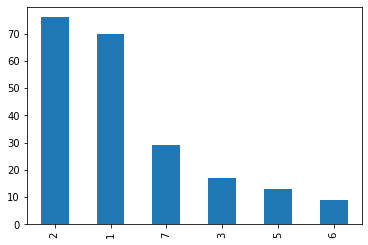

In [ ]:
data['Class'].value_counts().plot.bar()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

lr = LogisticRegression()
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .75)

lr = lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6851851851851852

On voit ci-dessus que l'on a à peine 62% de précision: l'entraînement ne s'est donc pas bien passé. Bien que ça n'explique pas tout, le fait d'avoir des classes déséquilibrées jouent en grande partie sur le résultat. Il faut donc en priorité résoudre ce problème.

Idéalement, pour réequilibrer les classes, ils faut rajouter des données appartenant aux classes lacunaires. Cependant, les données que vous aurez seront en général les seules que vous aurez pu obtenir. Il sera donc difficile de rajouter de nouvelles données. Il faut donc agir au niveau des données que l'on a. Pour cela, nous avons deux options: l'``Under-sampling`` et l'``Over-sampling``

En travaillant avec ``scikit-learn``, vous pouvez utiliser la librairie ``imblearn``, qui implémente ces différentes méthodes:

In [ ]:
!pip3 install imblearn

     |████████████████████████████████| 189 kB 514 kB/s eta 0:00:01


In [ ]:
X.shape, y.shape

((214, 9), (214, 1))

In [ ]:
import imblearn

## Under-sampling

La méthode la plus simple est de réduire le nombre de données à la plus petite classe. On s'assure ainsi d'avoir des classes équilibrées sans en créer de nouvelles. On parle alors d'``Under-sampling``. Il existe plusieurs méthodes d'Under-sampling, la plus simple étant la méthode aléatoire:

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
randomsampler = RandomUnderSampler(random_state=42) # random_state permet de s'assurer que les données seront toujours mélangées de la même manière
under_X, under_y = randomsampler.fit_resample(X, y)
print('Nouvelle forme des données: ', under_X.shape, under_y.shape)

Nouvelle forme des données:  (54, 9) (54, 1)


<AxesSubplot:>

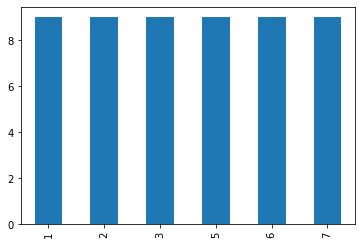

In [ ]:
under_y['Class'].value_counts().plot.bar()

In [ ]:
lr = lr.fit(under_X, under_y)
lr.score(X_test, y_test)

/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6666666666666666

Une autre méthode proposée par ``imblearn`` est d'utiliser un algorithme KNN pour réduire le nombre de samples. Il existe plusieurs variations de cette méthode, mais de manière générale, l'algorithme supprime tout point qui ne fait pas partie de la même classe que celle de la majorité des voisins:

Nouvelle forme des données:  (111, 9) (111, 1)


<AxesSubplot:>

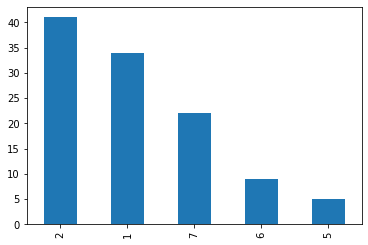

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours
nn_undersampler = EditedNearestNeighbours()
under_X, under_y = nn_undersampler.fit_resample(X, y)
print('Nouvelle forme des données: ', under_X.shape, under_y.shape)
under_y['Class'].value_counts().plot.bar()

In [ ]:
lr = lr.fit(under_X, under_y)
lr.score(X_test, y_test)

/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7037037037037037

## Over-sampling

On peut également créer des données factices. Celles-ci ressembleront aux données déjà existantes sans être exactement les mêmes. Il existe pour cela différentes méthodes et algorithmes. On parle d'``Over-sampling``.

Comme pour l'``Under-sampling``, la méthode la plus simple est de sélectionner aléatoirement des points de données et de les copier. Attention: simplement copier-coller les données de telle sorte à compléter les classes lacunaires n'est pas une solution. En effet, la qualité de l'algorithme dépend de la quantité et de la variété des données. Copier-coller les données ne ferait que rajouter des données que l'algorithme aura déjà vues:

Nouvelle forme des données:  (456, 9) (456, 1)


<AxesSubplot:>

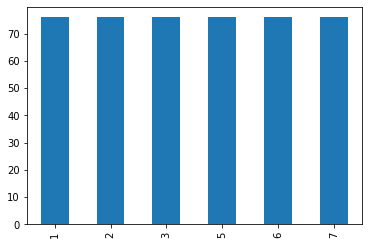

In [ ]:
from imblearn.over_sampling import RandomOverSampler
randomoversampler = RandomOverSampler(random_state = 42)
over_X, over_y = randomoversampler.fit_resample(X,y)
print('Nouvelle forme des données: ', over_X.shape, over_y.shape)
over_y['Class'].value_counts().plot.bar()

In [ ]:
lr = lr.fit(over_X, over_y)
lr.score(X_test, y_test)

/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7407407407407407

### SMOTE

Au lieu de copier aléatoirement des points de données comme dans la méthode précédente, ``SMOTE`` génère de nouveaux points de données à partir d'un algorithme de type KNN:

Nouvelle forme des données:  (456, 9) (456, 1)


<AxesSubplot:>

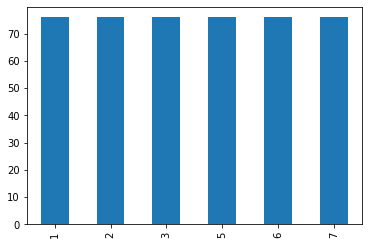

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
over_X, over_y = smote.fit_resample(X,y)
print('Nouvelle forme des données: ', over_X.shape, over_y.shape)
over_y['Class'].value_counts().plot.bar()

In [ ]:
lr = lr.fit(over_X, over_y)
lr.score(X_test, y_test)

/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6851851851851852

## Supprimer les mots vides

Les mots-vides, ou mots-outils, sont tous les mots tels que déterminants, pronoms, prépositions, etc. qui jouent un rôle syntaxique mais ne participent pas au niveau sémantique du texte. Comme décrit par la Loi de Zipf, ce sont les mots que l'on retrouve le plus dans un corpus, et qui par conséquent y sont les moins importants. 

Puisque la méthode sac de mots ne s'intéresse pas à l'organisation du texte, il est recommandé d'en supprimer les mots vides afin d'en réduire le nombre de dimensions.

Comme nous l'avons vu plus tôt, ``CountVectorizer`` prend en charge différents aspects du prétraitement, en particulier la suppression des mots vides. Cependant, il fonctionne par défaut sur l'anglais et ne propose pas de prétraitements pour le français. Ainsi, pour supprimer les mots vides français, il faut lui en fournir une liste, que vous trouverez dans le dossier ``data`` de ce cours. 

Nous allons dans la cellule ci-dessous charger ce fichier dans une liste, puis le donner en argument à ``CountVectorizer``:

In [2]:
fr_stopwords = []
with open('data/fr_stopwords.txt') as f:
  for line in f:
    # on enleve les sauts de lignes et eventuels espaces en trop
    line = line.strip()
    fr_stopwords.append(line)
fr_stopwords[:10]

['a',
 'abord',
 'absolument',
 'afin',
 'ah',
 'ai',
 'aie',
 'aient',
 'aies',
 'ailleurs']

In [3]:
cv = CountVectorizer(stop_words= fr_stopwords)
X = cv.fit_transform(corpus)

vec_df = pd.DataFrame(data = X.toarray(),
                        columns = cv.get_feature_names())
vec_df.index = corpus
vec_df.head()

/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['quelqu'] not in stop_words.
  warnings.warn(
/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,amener,anneau,gouverner,lier,trouver,ténèbres
Un anneau pour les gouverner tous.,0,1,1,0,0,0
Un anneau pour les trouver.,0,1,0,0,1,0
Un anneau pour les amener tous et dans les ténèbres les lier.,1,1,0,1,0,1


En supprimant les mots-vides, nous avons divisé par deux la taille de notre vocabulaire. Bien qu'ici il ne s'agisse que d'un faux corpus, cela peut avoir un impact considérable sur le temps et la qualité de l'entraînement.

## Etendre le contexte avec les n-grammes

Comme nous l'avons déjà dit, le sac de mot est du point de vue linguistique uniquement constitué d'un vocabulaire: la syntaxe de la phrase, et l'organisation générale du texte sont totalement mis de côté. Pourtant, un même vocabulaire dans différentes organisations peut donner de multiples sens, comme dans les deux phrases ci-dessous (en anglais):

* It's good, it's not so bad
* It's bad, it's not so good

Avec le sac de mot, nous perdons toutes subtilités apportées par l'organisation de chaque phrase, ce qui est problématique lorsque l'on cherche à traiter du texte comme dans le cas de l'analyse de sentiments.

Une solution pour faire face à ce problème tout en conservant la méthode du sac de mots est considérer les ``n-grammes``. "[Un n-gramme est une sous-séquence de n éléments construite à partir d'une séquence donnée](https://fr.wikipedia.org/wiki/N-gramme)" (Wikipedia). Jusque là, nous avons tokenizé les phrases au niveau de l'unité lexicale: nous avons donc pris des n-gramme de 1, ou ``unigramme``:

``[It, 's, good, it, 's, not, so, bad]``

Cependant, nous pouvons sélectionner des n-grammes de la taille n que nous souhaitons, comme des bigrammes (n-grammes de 2) ou trigrammes (n-grammes de 3). Par défaut, les tokens de ``CountVectorizer()`` sont des unigrammes, mais il est possible de choisir la taille des n-grammes en jouant avec le paramètre ``ngram_range``:

### N-grammes
* it's good it's not so bad
* unigramme: (it 's good it 's not so bad
* bigramme (it's) ('s good) (it 's) ('s not) (not so) (so bad)
* trigramme (it's good) ('s good it) (good it 's) (it 's not) ('s not so) (not so bad)

In [4]:
# ngram_range = (x, y)
# ou x est le nombre minimal d'elements à prendre en compte
# et y le nombre maximal


unigram_vectorizer = CountVectorizer()
X = unigram_vectorizer.fit_transform(corpus)

print("Unigram Vocabulary : ")
print(unigram_vectorizer.get_feature_names())

print("\n** **\n")

unibigram_vectorizer = CountVectorizer(ngram_range=(1,2))
X = unibigram_vectorizer.fit_transform(corpus)

print("Unigram et Bigram Vocabulary : ")
print(unibigram_vectorizer.get_feature_names())

print("\n** **\n")

bigram_vectorizer = CountVectorizer(ngram_range=(2,2))
X = bigram_vectorizer.fit_transform(corpus)

print("Bigram Vocabulary : ")
print(bigram_vectorizer.get_feature_names())

print("\n** **\n")



Unigram Vocabulary : 
['amener', 'anneau', 'dans', 'et', 'gouverner', 'les', 'lier', 'pour', 'tous', 'trouver', 'ténèbres', 'un']

** **

Unigram et Bigram Vocabulary : 
['amener', 'amener tous', 'anneau', 'anneau pour', 'dans', 'dans les', 'et', 'et dans', 'gouverner', 'gouverner tous', 'les', 'les amener', 'les gouverner', 'les lier', 'les trouver', 'les ténèbres', 'lier', 'pour', 'pour les', 'tous', 'tous et', 'trouver', 'ténèbres', 'ténèbres les', 'un', 'un anneau']

** **

Bigram Vocabulary : 
['amener tous', 'anneau pour', 'dans les', 'et dans', 'gouverner tous', 'les amener', 'les gouverner', 'les lier', 'les trouver', 'les ténèbres', 'pour les', 'tous et', 'ténèbres les', 'un anneau']

** **



/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


En général, la tokenization se fait au niveau des mots, mais elle est également intéressante au niveau des caractères lorsqu'on travaille par exemple sur un aspect morphologique (détection de la langue, création d'un autre tokenizer, ...). Pour cela, on précise l'analyzer comme étant ``'char'`` dans ``CountVectorizer`` (par défaut, celui-ci est fixé sur ``'word'``):

In [5]:
# analyzer : définie si CountVectorizer doit compter au niveau des mots (par défaut, 'word') ou des caractères ('char')
# 
analyzer = 'char'
unigram_vectorizer = CountVectorizer(analyzer = analyzer)
X = unigram_vectorizer.fit_transform(corpus)

print("Unigram Vocabulary : ")
print(unigram_vectorizer.get_feature_names())

print("\n** **\n")

unibigram_vectorizer = CountVectorizer(ngram_range=(1,2),
                                       analyzer = analyzer)
X = unibigram_vectorizer.fit_transform(corpus)

print("Unigram et Bigram Vocabulary : ")
print(unibigram_vectorizer.get_feature_names())

print("\n** **\n")

bigram_vectorizer = CountVectorizer(ngram_range=(2,2), 
                                    analyzer = analyzer)
X = bigram_vectorizer.fit_transform(corpus)

print("Bigram Vocabulary : ")
print(bigram_vectorizer.get_feature_names())

print("\n** **\n")

Unigram Vocabulary : 
[' ', '.', 'a', 'b', 'd', 'e', 'g', 'i', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'è', 'é']

** **

Unigram et Bigram Vocabulary : 
[' ', ' a', ' d', ' e', ' g', ' l', ' p', ' t', '.', 'a', 'am', 'an', 'au', 'b', 'br', 'd', 'da', 'e', 'ea', 'en', 'er', 'es', 'et', 'g', 'go', 'i', 'ie', 'l', 'le', 'li', 'm', 'me', 'n', 'n ', 'ne', 'nn', 'ns', 'nè', 'o', 'ou', 'p', 'po', 'r', 'r ', 'r.', 're', 'rn', 'ro', 's', 's ', 's.', 't', 't ', 'to', 'tr', 'té', 'u', 'u ', 'un', 'ur', 'us', 'uv', 'v', 've', 'è', 'èb', 'é', 'én']

** **

Bigram Vocabulary : 
[' a', ' d', ' e', ' g', ' l', ' p', ' t', 'am', 'an', 'au', 'br', 'da', 'ea', 'en', 'er', 'es', 'et', 'go', 'ie', 'le', 'li', 'me', 'n ', 'ne', 'nn', 'ns', 'nè', 'ou', 'po', 'r ', 'r.', 're', 'rn', 'ro', 's ', 's.', 't ', 'to', 'tr', 'té', 'u ', 'un', 'ur', 'us', 'uv', 've', 'èb', 'én']

** **



Suivant le problème que vous traitez ou suivant le besoin d'améliorer les résultats obtenu par votre modèle lors de l'entraînement, changer la taille des n-gramme peut s'avérer utile. Cependant, si ici notre corpus est ridicule, prendre des n-grammes trop grands sur de larges corpus risque d'augmenter grandement le nombre de feature, ce qui à terme déteriorera les performances du modèle ainsi que l'usage de la mémoire.

Il est donc conseillé d'utiliser des unigrammes, bigrammes, trigrammes, et au plus, des n-grammes de 5 éléments.

## Tf - Idf

Avec le ``CountVectorizer`` nous avons pu encoder les textes avec la présence ou non d'un mot dans un texte, puis avec son nombre d'occurrence. Bien que la seconde méthode s'est avérée plus pertinente que la première, elle ne nous dit rien de l'importance d'un terme par rapport aux autres dans un même document, et encore moins vis-à-vis des autres documents contenus dans un corpus. En effet, bien qu'un terme puisse apparaître un certain nombre de fois dans un document, il peut ne pas apparaître du tout dans les autre documents du corpus, ce qui le rend encore plus important pour la compréhesion du document actuel.

Ainsi, il pourrait être plus pertinent d'encoder le vocabulaire non pas par rapport à leur fréquence d'apparition mais par rapport à leur poids, c'est-à-dire par rapport à leur importance dans le document. Pour cela, nous pouvons utiliser la méthode ``Tf-Idf`` (pour ``Term frequency-Inverse document frequency``), qui repose sur le postulat expliqué ci-dessus. Nous ne reviendrons pas sur l'origine ni sur la façon de le calculer, mais sachez que le TF-IDF est utilisé dans de nombreux domaines du traitement de l'information autre que le Machine-Learning, en particulier les moteurs de recherches.

Dans ``scikit-learn``, le calcul du TF-IDF se fait à l'aide de la classe ``TfidfTransformer``. Celui-ci prend en entrée les résultats obtenus par ``CountVectorizer`` avant de les transformer en une matrice contenant les poids de chaque terme:

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

vectorizer = CountVectorizer()
vectorizer.fit(corpus)
X = vectorizer.transform(corpus)

tfidf = TfidfTransformer()
tfidf_X = tfidf.fit_transform(X)
print("Matrice de poids :")

tfidf_X
tfidf_X.toarray()

vec_df = pd.DataFrame(data = tfidf_X.toarray(),
                        columns = vectorizer.get_feature_names())
vec_df.index = corpus
vec_df.head()

Matrice de poids :


,amener,anneau,dans,et,gouverner,les,lier,pour,tous,trouver,ténèbres,un
Un anneau pour les gouverner tous.,0.000000,0.342496,0.000000,0.000000,0.579897,0.342496,0.000000,0.342496,0.441027,0.000000,0.000000,0.342496
Un anneau pour les trouver.,0.000000,0.381614,0.000000,0.000000,0.000000,0.381614,0.000000,0.381614,0.000000,0.646129,0.000000,0.381614
Un anneau pour les amener tous et dans les ténèbres les lier.,0.320021,0.189010,0.320021,0.320021,0.000000,0.567029,0.320021,0.189010,0.243384,0.000000,0.320021,0.189010


### Note

``TfidfVectorizer`` est une classe regroupant ``CountVectorizer`` et ``TfidfTransformer`` Celui-ci utilise en interne le calcul des fréquences d'apparitions des mots obtenus par ``CountVectorizer`` avant d'effectuer le calcul des poids de chaque terme à l'aide de ``TfidfTransformer``. Ainsi, si vous souhaitez utiliser la méthode Tf-idf dans ``scikit-learn``, il est recommandé d'utiliser le ``TfidfVectorizer`` pour plus de simplicité:

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

vec_df = pd.DataFrame(data = X.toarray(),
                        columns = vectorizer.get_feature_names())
vec_df.index = corpus
vec_df.head()

/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,amener,anneau,dans,et,gouverner,les,lier,pour,tous,trouver,ténèbres,un
Un anneau pour les gouverner tous.,0.000000,0.342496,0.000000,0.000000,0.579897,0.342496,0.000000,0.342496,0.441027,0.000000,0.000000,0.342496
Un anneau pour les trouver.,0.000000,0.381614,0.000000,0.000000,0.000000,0.381614,0.000000,0.381614,0.000000,0.646129,0.000000,0.381614
Un anneau pour les amener tous et dans les ténèbres les lier.,0.320021,0.189010,0.320021,0.320021,0.000000,0.567029,0.320021,0.189010,0.243384,0.000000,0.320021,0.189010


## Fixer la taille maximale du vocabulaire

Bien que l'on puisse modifier la taille du vocabulaire en jouant avec différents paramètres tels que les mots-vides ou les n-grammes, la façon la plus simple pour limiter au maximum le nombre de features est de simplement fixé une taille maximale à notre vocabulaire. 

Les vocabulaires que nous avont créés jusque là sur le ``amazon_review`` contenaient plus de 50 000 mots, pour lesquels seulement une poignée est contenue dans chaque document. Ainsi, on peut choisir de limiter le vocabulaire à 10 000 mots seulement, qui seront les 10 000 mots les plus fréquents de notre corpus. 

Bien entendu, en procédant de cette manière, on perd la possibilité d'encoder et de représenter le sens d'un grand nombre de documents.  Cependant, on peut à l'inverse se dire que seuls un certain nombre de mots est nécessaire à la compréhension générale de ce corpus. De plus, en procédant ainsi, on limite les risques liés à un trop grand nombre de features (cf. curse of dimensionality).

Pour limiter la taille du vocabulaire, on change la valeur du paramètre ``max_features``:

In [11]:
cv = CountVectorizer(max_features=3)
X = cv.fit_transform(corpus)

vec_df = pd.DataFrame(data = X.toarray(),
                        columns = cv.get_feature_names())
vec_df.index = corpus
vec_df.head()

/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,anneau,les,pour
Un anneau pour les gouverner tous.,1,1,1
Un anneau pour les trouver.,1,1,1
Un anneau pour les amener tous et dans les ténèbres les lier.,1,3,1


### Note

Comme on peut le voir ci-dessus, le vocabulaire n'est plus que constitué de 3 mots. Parmi ceux-là, on peut voir qu'il y a le mot vide 'les'. Puisque l'on ne garde que les mots les plus fréquents, et que l'on a pas supprimé les mots-vides, ceux-ci apparaîtrons forcément dans notre vocabulaire limité. 

``Ainsi, lorsqu'on limite la taille du vocabulaire, il ne faut pas oublier également de supprimer les mots vides.``

## Application des méthodes

Nous allons maintenant essayer d'appliquer ces différentes méthodes, séparément puis ensemble, à notre corpus d'analyse de sentiment afin d'essayer d'entraîner un meilleur modèle. Nous allons commencer par charger les données que nous avons préparé au cours précédent, puis créer un dictionnaire ``results`` qui nous permettra de stocker ces différents résultats et de les visualiser:

### Chargement des données

In [7]:
import pandas as pd

train = pd.read_csv('data/binary/bi_as_train.csv')
dev = pd.read_csv('data/binary/bi_as_dev.csv')
test = pd.read_csv('data/binary/bi_as_test.csv')

# on concatène les résultats pour entraîner le vectorizer
# sur l'ensemble du corpus
data = pd.concat([train['texts'], dev['texts'], test['texts']])

# dictionnaire dans lequel on va stocker les performances 
# de chaque modèle
results = {}

train.head()

,texts,classes
0,A déconseiller - Article n'a fonctionné qu'une...,0
1,Si vous voulez être déçu achetez le produit ! ...,0
2,"Écran de mauvaise qualité, car il s'use en peu...",0
3,Cet engin ne sert à rien les sons sont pourris...,0
4,Très beau produit mais la grue n'a pas fonctio...,0


### Chargement du modèle précédent
Afin de pouvoir comparer les résultats des différentes méthodes, nous allons charger notre modèle précédent ainsi que le vectorize associé:

In [8]:
from joblib import load
cv1 = load('data/logreg_model/vectorizer.joblib')
model = load('data/logreg_model/model.joblib')

In [14]:
model

LogisticRegression()

In [9]:
X_dev, y_dev = cv1.transform(dev['texts']), dev['classes']
print("Forme de la matrice :", X_dev.shape)

X_test, y_test = cv1.transform(test['texts']), test['classes']
print("Forme de la matrice :", X_test.shape)

score = model.score(X_dev, y_dev)
results['cv_1'] = score
print("Score :", score)


Forme de la matrice : (4000, 48768)
Forme de la matrice : (4000, 48768)
Score : 0.88425


In [12]:
score = model.score(X_dev, y_dev)
score


0.88425

In [11]:
model.score(X_test, y_test)

0.886

### CV2 (CountVectorizer en supprimant les mots vides) 

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

cv2 = CountVectorizer(stop_words=fr_stopwords)

# fit_transform regroupe les deux étapes fit et transform en une seule
cv2.fit(data) 

X_train, y_train = cv2.transform(train['texts']), train['classes']
print("Forme de la matrice :", X_train.shape)

X_dev, y_dev = cv2.transform(dev['texts']), dev['classes']
print("Forme de la matrice :", X_dev.shape)

X_test, y_test = cv2.transform(test['texts']), test['classes']
print("Forme de la matrice :", X_test.shape)


lr = LogisticRegression()
lr.fit(X_train, y_train)

score = lr.score(X_dev, y_dev)
results['cv2'] = score
print("Score :", score)

/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['quelqu'] not in stop_words.
  warnings.warn(


Forme de la matrice : (160000, 48199)
Forme de la matrice : (4000, 48199)
Forme de la matrice : (4000, 48199)
Score : 0.8535


/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
lr.score(X_test, y_test)

0.8555

### CV3 (CountVectorizer en prenant des bigrammes)

In [15]:
cv3 = CountVectorizer(ngram_range=(2,2))

# fit_transform regroupe les deux étapes fit et transform en une seule
cv3.fit(data) 

X_train, y_train = cv3.transform(train['texts']), train['classes']
print("Forme de la matrice :", X_train.shape)

X_dev, y_dev = cv3.transform(dev['texts']), dev['classes']
print("Forme de la matrice :", X_dev.shape)

X_test, y_test = cv3.transform(test['texts']), test['classes']
print("Forme de la matrice :", X_test.shape)

lr = LogisticRegression()
lr.fit(X_train, y_train)

score = lr.score(X_dev, y_dev)
results['cv3'] = score
print("Score :", score)

Forme de la matrice : (160000, 827766)
Forme de la matrice : (4000, 827766)
Forme de la matrice : (4000, 827766)
Score : 0.90975


/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
lr.score(X_test, y_test)

0.899

### TF1 (Tf-idf seul)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf1 = TfidfVectorizer()
tf1.fit(data) 

X_train, y_train = tf1.transform(train['texts']), train['classes']
print("Forme de la matrice :", X_train.shape)

X_dev, y_dev = tf1.transform(dev['texts']), dev['classes']
print("Forme de la matrice :", X_dev.shape)

X_test, y_test = tf1.transform(test['texts']), test['classes']
print("Forme de la matrice :", X_test.shape)

lr = LogisticRegression()
lr.fit(X_train, y_train)

score = lr.score(X_dev, y_dev)
results['tf1'] = score
print("Score :", score)

Forme de la matrice : (160000, 48768)
Forme de la matrice : (4000, 48768)
Forme de la matrice : (4000, 48768)
Score : 0.89125


In [18]:
lr.score(X_test, y_test)

0.89275

### TF2 (Tf-idf en supprimant les mots vides)

In [19]:
tf2 = TfidfVectorizer(stop_words=fr_stopwords)
tf2.fit(data) 


X_train, y_train = tf2.transform(train['texts']), train['classes']
print("Forme de la matrice :", X_train.shape)

X_dev, y_dev = tf2.transform(dev['texts']), dev['classes']
print("Forme de la matrice :", X_dev.shape)

X_test, y_test = tf2.transform(test['texts']), test['classes']
print("Forme de la matrice :", X_test.shape)

lr = LogisticRegression()
lr.fit(X_train, y_train)

score = lr.score(X_dev, y_dev)
results['tf2'] = score
print('Score :', score)

/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['quelqu'] not in stop_words.
  warnings.warn(


Forme de la matrice : (160000, 48199)
Forme de la matrice : (4000, 48199)
Forme de la matrice : (4000, 48199)
Score : 0.86125


/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
lr.score(X_test, y_test)

0.856

### TF3 (Tf-idf en supprimant les mots-vides et prenant des bigrammes)

In [21]:
tf3 = TfidfVectorizer(stop_words=fr_stopwords,
                            ngram_range=(2,2))
tf3.fit(data) 


X_train, y_train = tf3.transform(train['texts']), train['classes']
print("Forme de la matrice :", X_train.shape)

X_dev, y_dev = tf3.transform(dev['texts']), dev['classes']
print("Forme de la matrice :", X_dev.shape)

X_test, y_test = tf3.transform(test['texts']), test['classes']
print("Forme de la matrice :", X_test.shape)

lr = LogisticRegression()
lr.fit(X_train, y_train)

score = lr.score(X_dev, y_dev)
results['tf3'] = score
print('Score :', score)

/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['quelqu'] not in stop_words.
  warnings.warn(


Forme de la matrice : (160000, 1016363)
Forme de la matrice : (4000, 1016363)
Forme de la matrice : (4000, 1016363)
Score : 0.79


In [29]:
lr.score(X_test, y_test)

0.7945

### TF4 (Tf-idf en supprimant les mots-vides et limitant le vocabulaire)

In [22]:
tf4 = TfidfVectorizer(stop_words=fr_stopwords,
                            max_features= 10000)

# fit_transform regroupe les deux étapes fit et transform en une seule
tf4.fit(data) 


X_train, y_train = tf4.transform(train['texts']), train['classes']
print("Forme de la matrice :", X_train.shape)

X_dev, y_dev = tf4.transform(dev['texts']), dev['classes']
print("Forme de la matrice :", X_dev.shape)

X_test, y_test = tf4.transform(test['texts']), test['classes']
print("Forme de la matrice :", X_test.shape)


lr = LogisticRegression()
lr.fit(X_train, y_train)

score = lr.score(X_dev, y_dev)
results['tf4'] = score
print("Score :", score)

/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['quelqu'] not in stop_words.
  warnings.warn(


Forme de la matrice : (160000, 10000)
Forme de la matrice : (4000, 10000)
Forme de la matrice : (4000, 10000)
Score : 0.86175


In [23]:
lr.score(X_test, y_test)

0.85825

### Visualisation des performances

<AxesSubplot:>

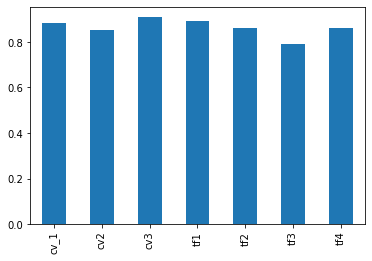

In [24]:
viz = pd.Series(results)
viz.plot.bar()

Avec le graphique ci-dessus, on peut voir que les meilleurs résultats sont d'abord obtenus par CV3 (CountVectorizer en prenant des bigrammes), suivis de près par TF1 (Tf-idf sans aucun  changement paramètre).

A l'inverse, les plus mauvais résultats sont obtenus par TF3 (Tf-idf en supprimant les mots vides et en prenant les bigrammes), suivis par CV2 (CountVectorizer en supprimant seulement les mots-vides). 

On se rend donc bien compte que jouer sur les différentes méthodes d'encodage du vocabulaire ainsi que de jouer avec leurs paramètres peut avoir une grande influence sur les performances de nos modèles.

## Pipeline


Une fois un modèle entraîné, il est important de le sauvegarder sur le disque afin de conserver l'entraînement ainsi que pour l'utiliser dans d'autres programmes. Cependant, il est important de sauvegarder tout outil de prétraitement (comme un vectorizer) utilisé pendant la phase d'entraînement afin d'appliquer les mêmes traitements à ces nouvelles données.

Précédemment, nous avons sauvegardé notre modèle ainsi que son vectorizer sur le disque. Cependant, ceci peut s'avérer laborieux lors de la mise en production puisqu'il faut appliquer la même chaîne de traitements que lors de l'entraînement. Pour faciliter cette étape, il est possible de créer à l'aide de ``scikit-learn`` une ``Pipeline``: celle-ci permet d'associer les différentes étapes de prétraitement ainsi que le modèle au sein d'un seul et même objet. 

Cet objet ``Pipeline`` se comporte comme un modèle et peut donc s'entraîner sur des données avant d'être utilisé pour prédire de nouveaux résultats. A la différence des autres modèles, il appliquera directement tout prétraitement qu'on le lui aura ajouté, tel qu'un vectorizer.

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from joblib import dump

# ici on se contente simplement de renommer les variables
# sans les faire passer par CountVectorizer
X_train, y_train = train['texts'], train['classes']
X_dev, y_dev = dev['texts'], dev['classes']

# Pipeline prend en argument une liste de tuple
# Le 1er element du tuple est le nom de l'objet, le 2nd est l'objet lui-meme
pipe = Pipeline(
    [
     ('vectorizer', CountVectorizer(ngram_range=(2,2))), # 1ere couche : vectorizer
     ('linear', LogisticRegression()) # Derniere couche : modele
    ]
)


# on entraine le Pipeline comme si l'on entrainait un modele
pipe.fit(X_train, y_train)
score = pipe.score(X_dev, y_dev)
print("Score :", score)


/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Score : 0.90975


On peut ensuite sauvegarder la Pipeline sur le disque comme précédemment, à la différence que l'on ne sauvegarde qu'un seul objet cette fois:

In [35]:
from joblib import dump
import os
os.mkdir('data/pipe_model')
dump(pipe, 'data/pipe_model/model.joblib')

['data/pipe_model/model.joblib']

# Références

Le fichier d'origine de mots vides français a été obtenu ici: https://lionbridge.ai/datasets/20-best-french-language-datasets-for-machine-learning/

### Documentation: 
* Pipeline : https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline